<h2>TITANIC SURVIVAL PREDICTION<h2>

<h4>CodSoft Virtual Intership Task-1<h4>

<h4>Importing Necessary Libraries<h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Loading the data dataset and getting to know 

In [3]:
df=pd.read_csv('tested.csv')


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#Name of the columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#no.of rows and columns in the dataset
print("shape of the dataset:",df.shape,"\n")
# Checking the data types of the columns
print("Data types of the columns:",df.dtypes,"\n")
#sum of the null values in each column
print("Sum of the null values in the dataset:\n",df.isnull().sum())

shape of the dataset: (418, 12) 

Data types of the columns: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Sum of the null values in the dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Data PreProcessing

In [9]:
df['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [10]:
#there are a lot of empty entries in the cabin column so let's drop it.
df.drop(columns='Cabin')
#lets use mean() for filling thr missing values in the column Age
df['Age'].fillna(df['Age'].mean(),inplace=True)
#lets use mode() for filling thr missing values in the column fare
df['Fare'].fillna(df['Fare'].mode(),inplace=True)

In [11]:

# Finding the number of people survived and not survived
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

From the dataset we get to know that 0=not survived and 1=survived

<Axes: xlabel='Survived', ylabel='count'>

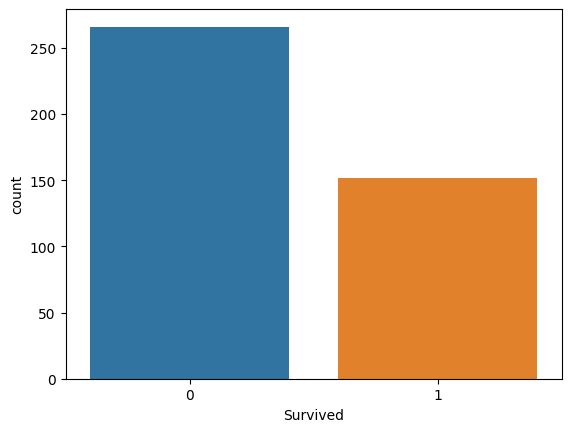

In [12]:
# Graphical representation of Survived column
sns.countplot(x='Survived', data=df)

In [13]:

# Number of males and females in Titanic
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

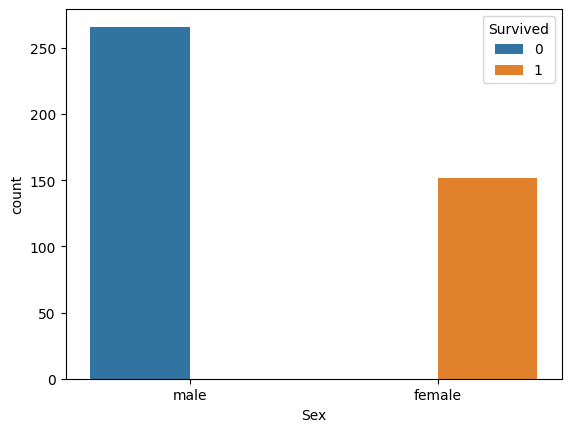

In [14]:

# Graphical representation of Survied based on Gender
sns.countplot(x='Sex', hue='Survived', data=df)

<b>CONCLUSION<b>:All the males have not survived and all the females have survived

In [15]:
# Number of passengers in each passenger class
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

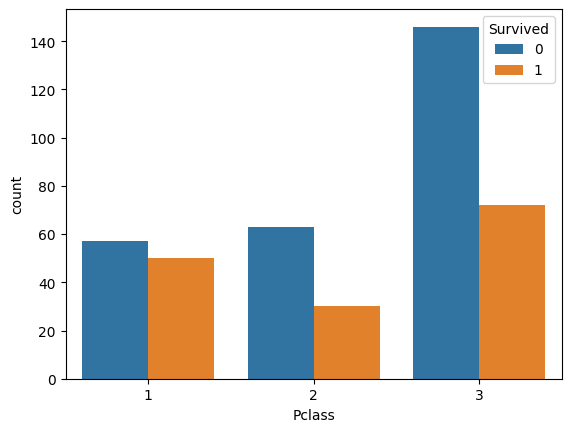

In [16]:
# Graphical representation of Survived based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)

<b>CONCLUSION: Majority of the Passenger class 3 did not survive and only a minority in the class 1 did not survive

In [17]:
# Converting the categorical columns
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':1, 'C':2, 'Q':3}}, inplace=True)

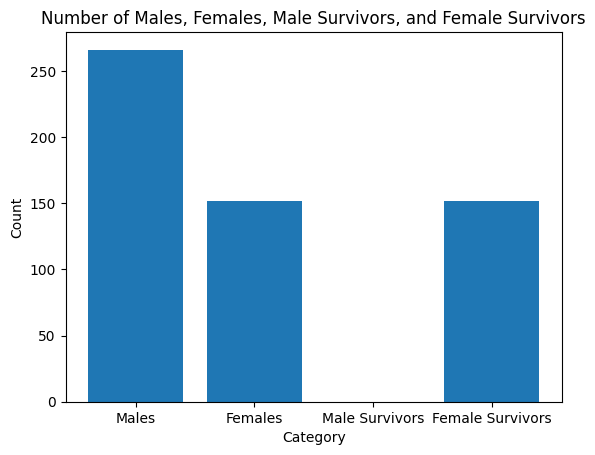

Number of males: 266
Number of females: 152
Number of male survivors: 0
Number of female survivors: 152


In [18]:
# Count the number of males and females
male_count = df[df['Sex'] == 0].shape[0]
female_count = df[df['Sex'] == 1].shape[0]

# Count the number of male survivors and female survivors
male_survivors = len(df[(df['Sex'] == 0) & (df['Survived'] == 1)])
female_survivors = len(df[(df['Sex'] == 1) & (df['Survived'] == 1)])

labels = ['Males', 'Females', 'Male Survivors', 'Female Survivors']
counts = [male_count, female_count, male_survivors, female_survivors]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Males, Females, Male Survivors, and Female Survivors')

# Display the plot
plt.show()

# Print the results
print("Number of males:", male_count)
print("Number of females:", female_count)
print("Number of male survivors:", male_survivors)
print("Number of female survivors:", female_survivors)

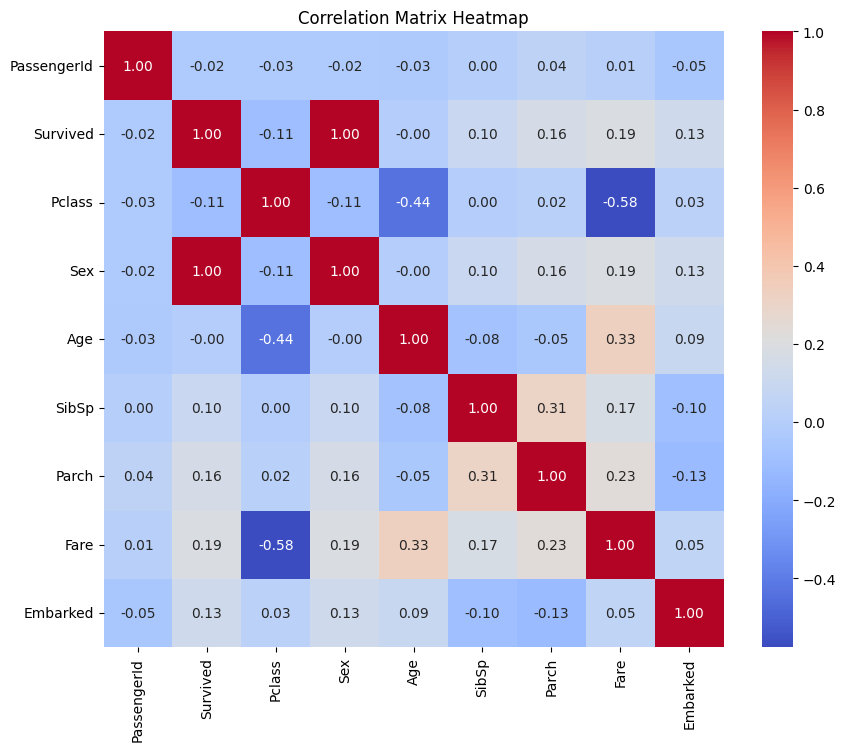

In [19]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

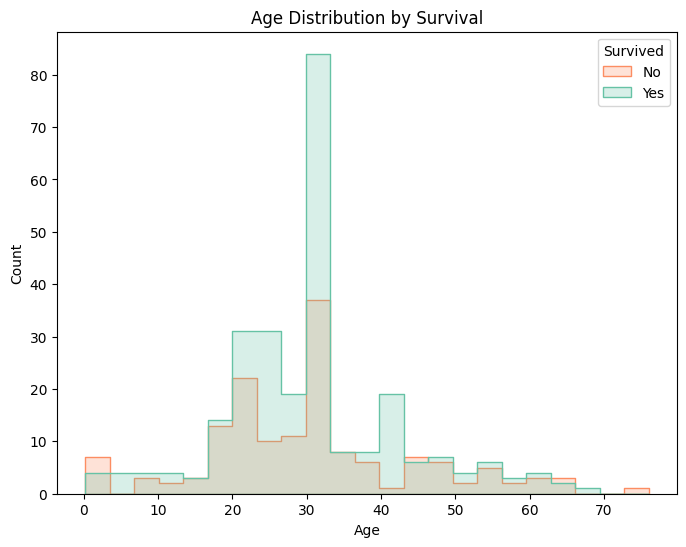

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', element='step', common_norm=False, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

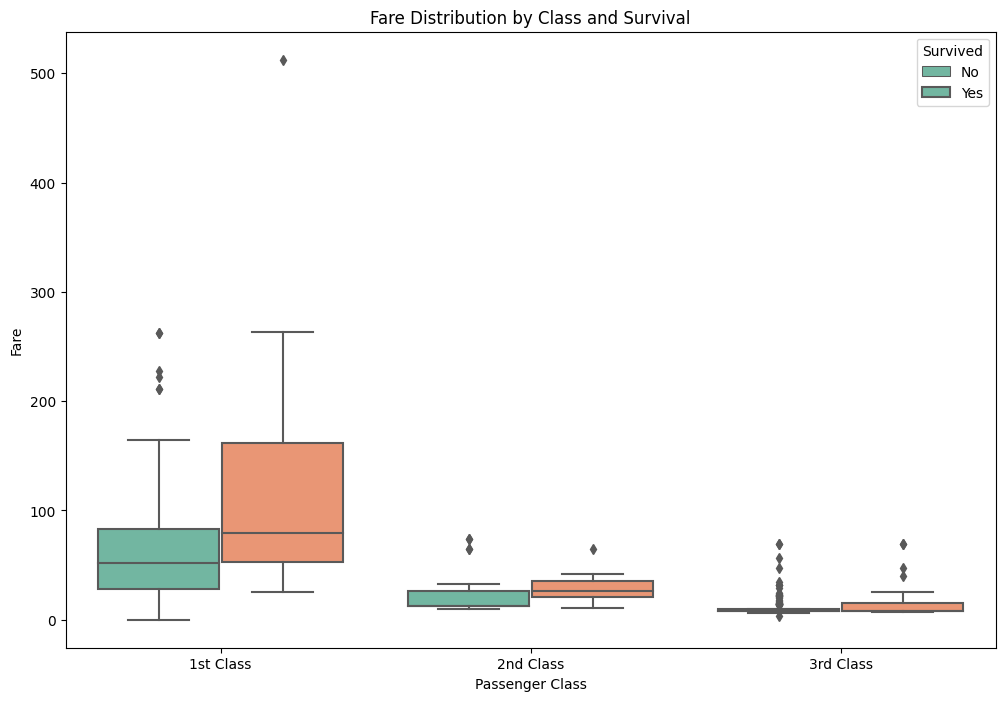

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set2')
plt.title('Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

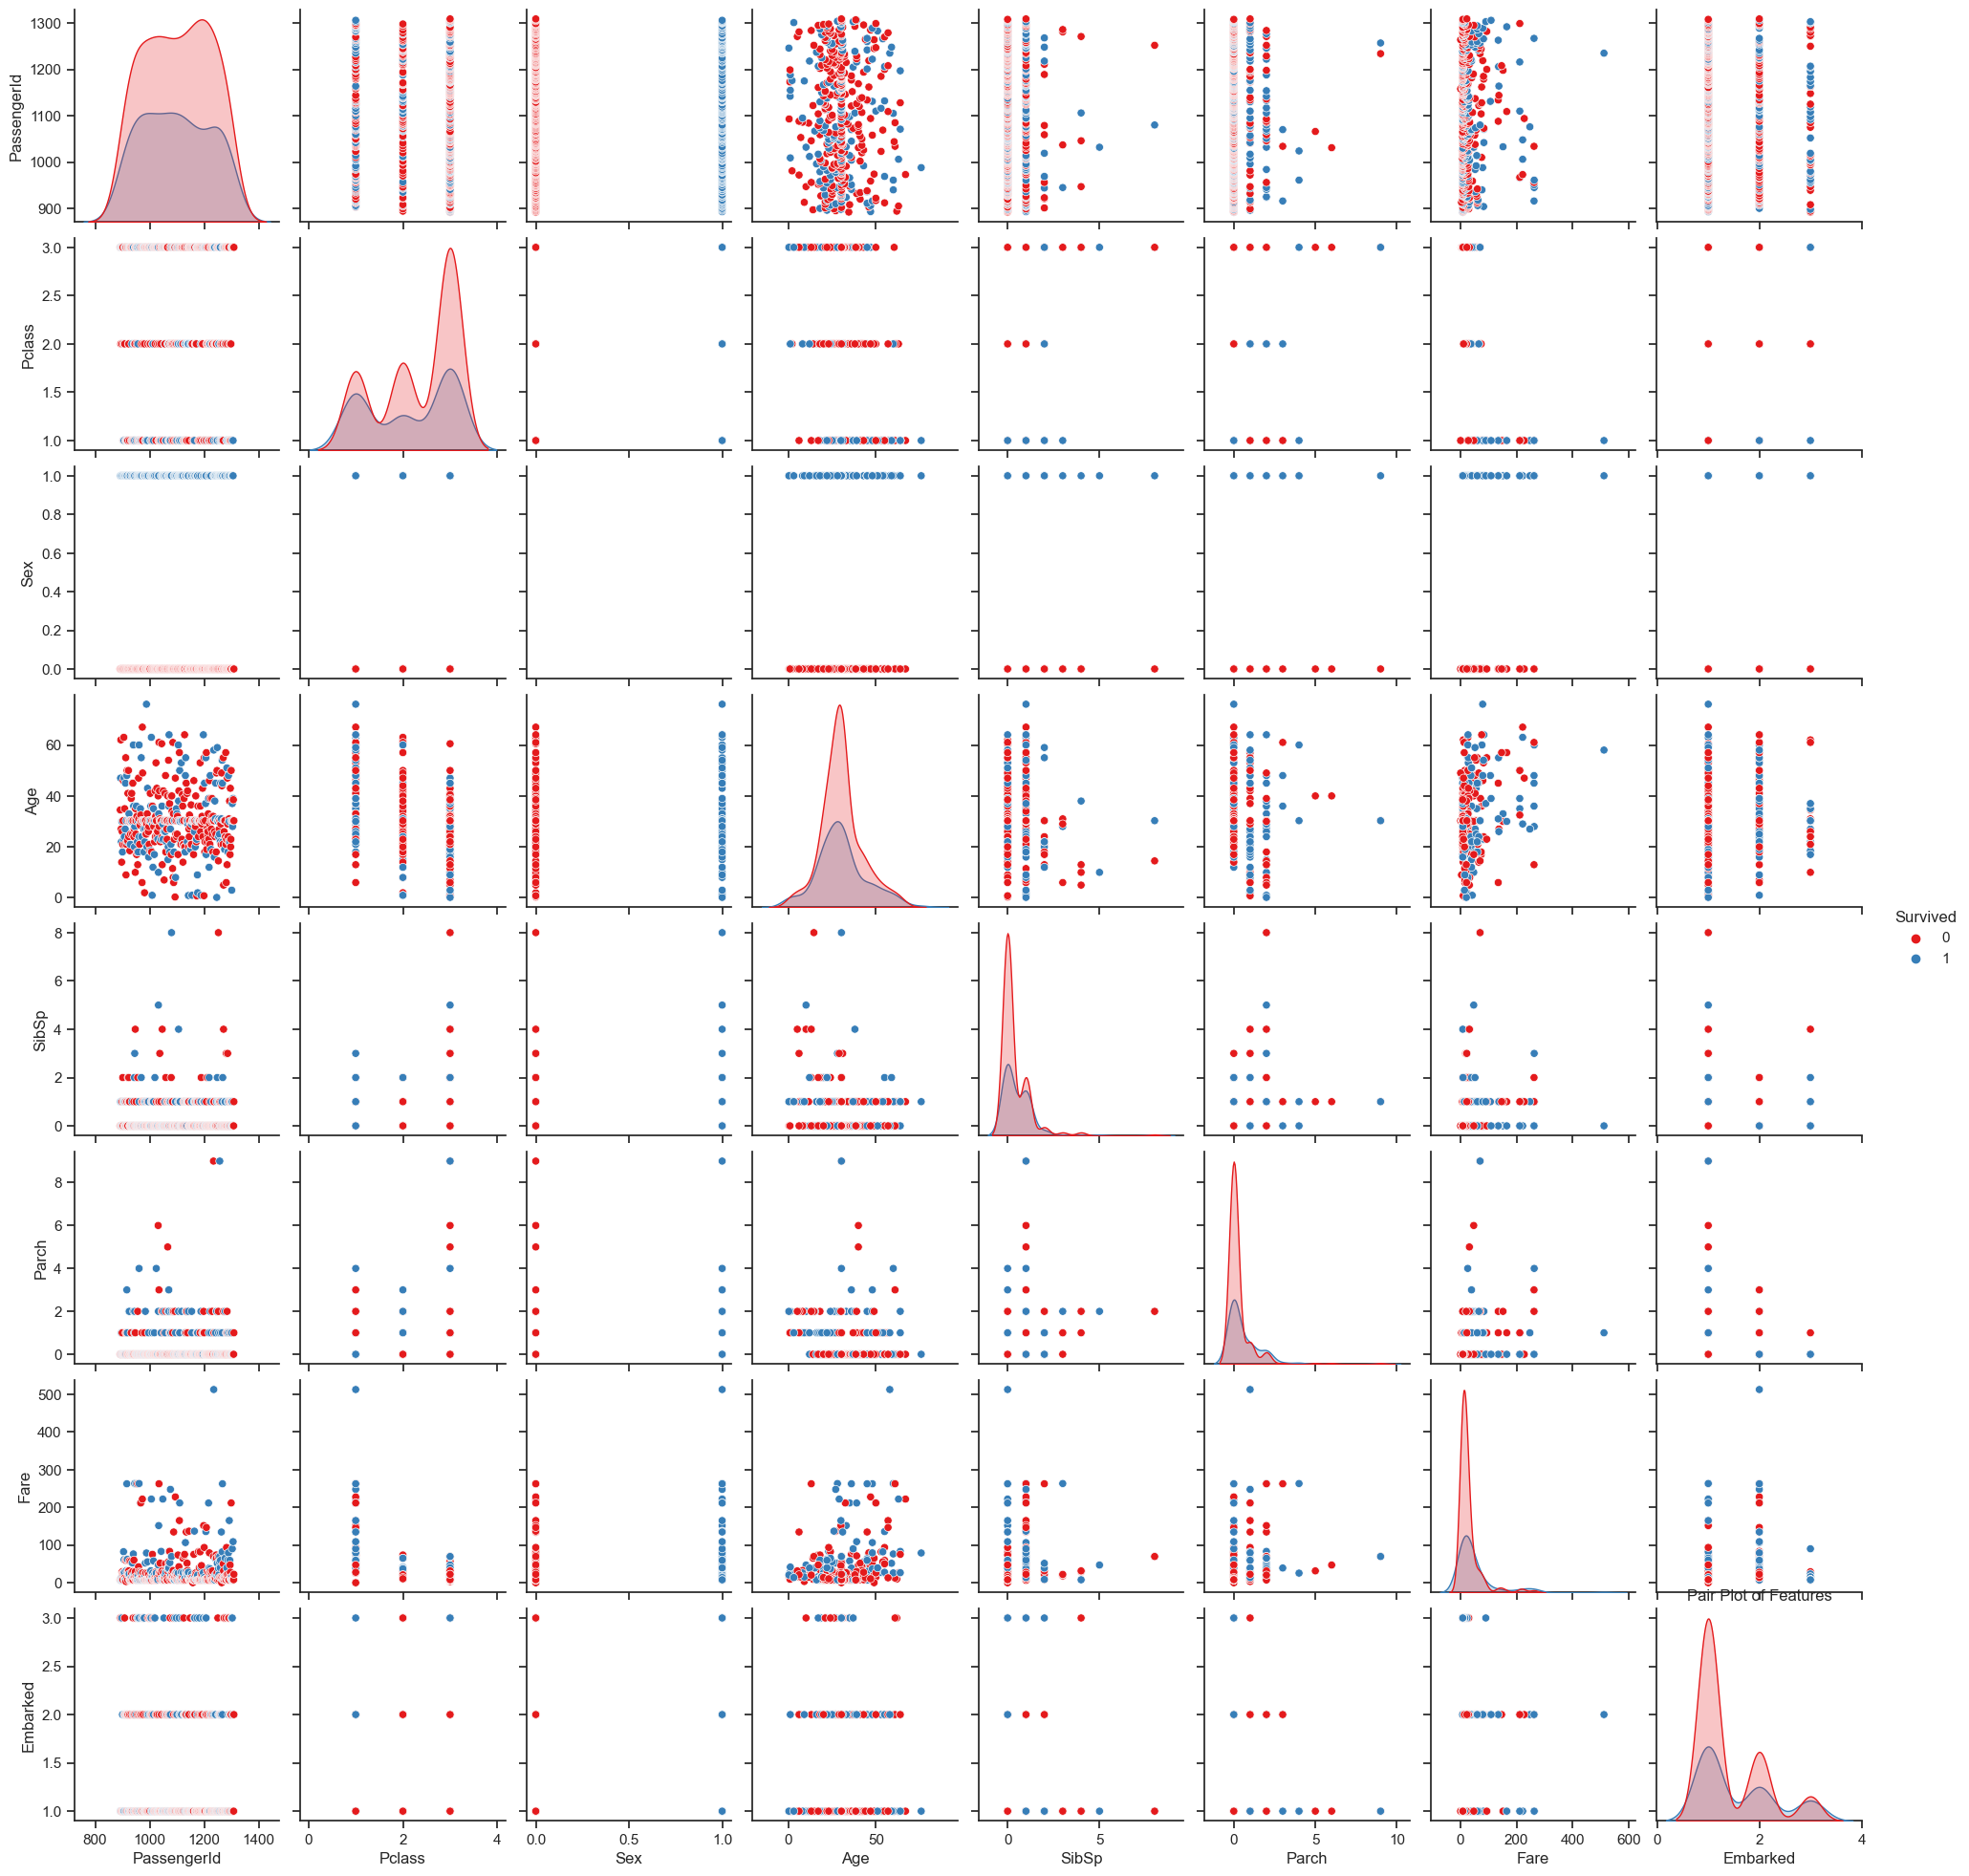

In [22]:
sns.set(style="ticks")
sns.pairplot(data=df, hue='Survived', palette='Set1')
plt.title('Pair Plot of Features')
plt.show()

In [23]:
x = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train = pd.get_dummies(x_train)
x_train = x_train.fillna(x_train.mean())

In [24]:
# Get missing columns in the training test
missing_cols = set(x_train.columns) - set(x_test.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
x_test = x_test[x_train.columns]

Data Feature Scalling

In [25]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Data Feature Selection

In [26]:
selector = SelectKBest(f_classif, k=10)
x_train_selected = selector.fit_transform(x_train_scaled, y_train)
x_test_selected = selector.transform(x_test_scaled)

<H4>Model Training 
</H4>
Random Forest Classifier

In [27]:
model_1= RandomForestClassifier(n_estimators=100, random_state=42)
# Training model with train data
model_1.fit(x_train, y_train)

gradient_boosting = GradientBoostingClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_rf = GridSearchCV(estimator=model_1, param_grid=param_grid_rf, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
grid_search_rf.fit(x_train_selected, y_train)
best_rf_model = grid_search_rf.best_estimator_

grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gb, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
grid_search_gb.fit(x_train_selected, y_train)
best_gb_model = grid_search_gb.best_estimator_
     

Decision Tree Classifier

In [28]:
model_2 = DecisionTreeClassifier(max_depth=None)
model_2.fit(x_train,y_train)

DecisionTreeClassifier()

<h4>Model Testing</h4>

In [29]:
# Accuracy on test data
x_test_prediction_1 = model_1.predict(x_test)
accuracy_1 = accuracy_score(y_test, x_test_prediction_1)
print("RandomForestClassifier\nAccuracy Score: ", accuracy_1)

x_test_prediction_2 = model_2.predict(x_test)
accuracy_2 = accuracy_score(y_test, x_test_prediction_2)
print("DecisionTreeClassifier\nAccuracy Score: ", accuracy_2)

RandomForestClassifier
Accuracy Score:  1.0
DecisionTreeClassifier
Accuracy Score:  1.0


In [30]:

# Classification Report
print("Random Forest Classifier Performance:")
print(classification_report(y_test, x_test_prediction_1))
print()
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, x_test_prediction_2))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [31]:
# Predictions for the GradientBoosting model
gb_predictions = best_gb_model.predict(x_test_selected)
print("Classification Report for GradientBoosting:\n", classification_report(y_test, gb_predictions))

Classification Report for GradientBoosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

